In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
import folium
from folium.plugins import HeatMap, MousePosition
import random
# from branca.element import Template, MacroElement
from geopy.distance import geodesic
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, make_scorer

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 290)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df_ = pd.read_csv('hemnet_lastt.csv')

In [3]:
df = df_.copy()

In [4]:
df.head()

,street,property_type,build_year,ownership_type,housing_form,living_area,land_area,county,area,price,wanted_price,latitude,longitude,fee,operating_cost,rooms,floor,balcony,construction_date,association,broker,url,price_change,story,sold_year,sold_month,sold_date
0,Östra Hamngatan 2,Lägenhet,2011-01-01,Bostadsrätt,APARTMENT,61.00000,0.00000,Västerås,Östra Hamnen,2750000,2595000.00000,59.60582,16.55453,3008.00000,0,2.00000,NaN,Ja,0,NaN,Notar,https://www.hemnet.se/salda/lagenhet-2rum-ostr...,0.06000,"3, hiss finns",2021,5,2021-05-01
1,Läckövägen 26 *ACCEPTERAT PRIS*,Lägenhet,1943-01-01,Bostadsrätt,APARTMENT,52.00000,0.00000,Stockholms,Hammarbyhöjden/Björkhagen,3650000,3357758.70178,59.29561,18.11201,3005.00000,0,3.00000,NaN,Ja,0,NaN,Svenska Mäklarhuset Johanneshov,https://www.hemnet.se/salda/lagenhet-3rum-hamm...,0.10000,"3 av 3, hiss finns ej",2023,3,2023-03-01
2,Torglägenheterna 6,Lägenhet,2018-01-01,Bostadsrätt,APARTMENT,53.00000,0.00000,Malung-Sälens,"Sälfjällstorget, Sälen",2199000,2199000.00000,61.16565,13.17880,2150.00000,0,4.00000,NaN,NaN,0,BRF Torglägenheterna,Fastighetsbyrån Sälen,https://www.hemnet.se/salda/lagenhet-4rum-salf...,0.00000,NaN,2018,11,2018-11-01
3,Hovgatan 9,Villa,2013-01-01,Äganderätt,HOUSE,166.00000,1009.00000,Vellinge,Vellinge,8200000,1170005.05723,55.47701,13.05013,1518.78440,0,5.00000,NaN,NaN,0,NaN,MALM PERSSON FASTIGHETSBYRÅ AB,https://www.hemnet.se/salda/villa-5rum-velling...,0.22000,NaN,2021,6,2021-06-01
4,Sköntorpsvägen 18,Lägenhet,1948-01-01,Bostadsrätt,APARTMENT,66.00000,0.00000,Stockholms,Årsta,2900000,2700000.00000,59.29842,18.06715,3171.00000,0,3.00000,NaN,NaN,0,HSB Brf Ymsen i Stockholm,SkandiaMäklarna Årsta,https://www.hemnet.se/salda/lagenhet-3rum-arst...,0.07000,NaN,2014,9,2014-09-01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208059 entries, 0 to 1208058
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   street             1208059 non-null  object 
 1   property_type      1208059 non-null  object 
 2   build_year         1056196 non-null  object 
 3   ownership_type     1208059 non-null  object 
 4   housing_form       1208059 non-null  object 
 5   living_area        1208059 non-null  float64
 6   land_area          1208059 non-null  float64
 7   county             1208059 non-null  object 
 8   area               1208059 non-null  object 
 9   price              1208059 non-null  int64  
 10  wanted_price       1208059 non-null  float64
 11  latitude           1208059 non-null  float64
 12  longitude          1208059 non-null  float64
 13  fee                1208059 non-null  float64
 14  operating_cost     1208059 non-null  int64  
 15  rooms              1208059 non-n

In [6]:
translation_dict={
'Äganderätt':'Freehold',
'Bostadsrätt':'Cooperative apartment',
'Annat':'Other',
'Andelsboende':'Cooperative housing',
'Tomträtt':'Landlease',
'Andelibostadsförening':'Share in housing association',
'Informationsaknas':'Information missing',
'Hyresrätt':'Rental'
}
df['ownership_type_']=df['ownership_type'].map(translation_dict)

In [7]:
df.drop(columns = ['property_type'], inplace=True)

In [8]:
df.drop(columns = 'ownership_type_', inplace=True)

In [9]:
df.isnull().sum()

street                     0
build_year            151863
ownership_type             0
housing_form               0
living_area                0
land_area                  0
county                     0
area                       0
price                      0
wanted_price               0
latitude                   0
longitude                  0
fee                        0
operating_cost             0
rooms                      0
floor                1208059
balcony               920200
construction_date          0
association           883118
broker                     0
url                        0
price_change               0
story                 943279
sold_year                  0
sold_month                 0
sold_date                  0
dtype: int64

In [10]:
df2 = df[df['balcony'].notna()]

In [11]:
df2.head()

,street,build_year,ownership_type,housing_form,living_area,land_area,county,area,price,wanted_price,latitude,longitude,fee,operating_cost,rooms,floor,balcony,construction_date,association,broker,url,price_change,story,sold_year,sold_month,sold_date
0,Östra Hamngatan 2,2011-01-01,Bostadsrätt,APARTMENT,61.00000,0.00000,Västerås,Östra Hamnen,2750000,2595000.00000,59.60582,16.55453,3008.00000,0,2.00000,NaN,Ja,0,NaN,Notar,https://www.hemnet.se/salda/lagenhet-2rum-ostr...,0.06000,"3, hiss finns",2021,5,2021-05-01
1,Läckövägen 26 *ACCEPTERAT PRIS*,1943-01-01,Bostadsrätt,APARTMENT,52.00000,0.00000,Stockholms,Hammarbyhöjden/Björkhagen,3650000,3357758.70178,59.29561,18.11201,3005.00000,0,3.00000,NaN,Ja,0,NaN,Svenska Mäklarhuset Johanneshov,https://www.hemnet.se/salda/lagenhet-3rum-hamm...,0.10000,"3 av 3, hiss finns ej",2023,3,2023-03-01
5,Kronogatan 35,1962-01-01,Bostadsrätt,APARTMENT,43.00000,0.00000,Vänersborgs,Nordstan,660000,590000.00000,58.38168,12.32775,2865.00000,0,1.00000,NaN,Ja,0,NaN,Mäklarhuset Vänersborg,https://www.hemnet.se/salda/lagenhet-1rum-nord...,0.12000,NaN,2019,7,2019-07-01
8,Bredmansgatan 4D,1945-01-01,Bostadsrätt,APARTMENT,59.00000,0.00000,Uppsala,Luthagen,2150000,2195000.00000,59.86019,17.61567,2893.00000,0,2.00000,NaN,Ja,0,NaN,Widerlöv Uppsala,https://www.hemnet.se/salda/lagenhet-2rum-luth...,0.02000,NaN,2020,4,2020-04-01
17,Lasarettsgatan 9,1988-01-01,Bostadsrätt,APARTMENT,63.00000,0.00000,Jönköpings,Väster,1925000,1800000.00000,57.77921,14.15755,3992.00000,0,2.00000,NaN,Ja,0,NaN,Länsförsäkringar Fastighetsförmedling Jönköping,https://www.hemnet.se/salda/lagenhet-2rum-vast...,0.07000,"4 av 5, hiss finns",2021,1,2021-01-01


In [12]:
df2.shape

(287859, 26)

In [13]:
df2.shape[0] / 4

71964.75

In [14]:
df3 = df[df['balcony'].isna()]
df3 = df3.sample(72000, random_state = 0)

In [15]:
one_hot_columns = ['housing_form', 'ownership_type', 'county','balcony', 'sold_year', 'sold_month']
drop_columns = ['street', 'build_year', 'land_area', 'area', 'latitude', 'longitude', 'operating_cost',
                 'association', 'broker', 'story' ,'fee','url', 'build_year', 'sold_date', 'floor', 'construction_date']

In [16]:
dfd = pd.get_dummies(df2, columns = one_hot_columns, dtype = int, drop_first = True)
dfd.head()

,street,build_year,living_area,land_area,area,price,wanted_price,latitude,longitude,fee,operating_cost,rooms,floor,construction_date,association,broker,url,price_change,story,sold_date,housing_form_APARTMENT,housing_form_ESTATE_WITHOUT_CULTIVATION,housing_form_FORESTING_ESTATE,housing_form_HOMESTEAD,housing_form_HOUSE,housing_form_LINKED_HOUSE,housing_form_OTHER,housing_form_PLOT,housing_form_ROW_HOUSE,housing_form_TERRACED_HOUSE,housing_form_TWIN_HOUSE,housing_form_VACATION_HOME,housing_form_VACATION_HOUSE,housing_form_WINTERIZED_VACATION_HOME,ownership_type_Andelsboende,ownership_type_Annat,ownership_type_Bostadsrätt,ownership_type_Tomträtt,ownership_type_Äganderätt,county_Alingsås,county_Alvesta,county_Aneby,county_Arboga,county_Arjeplogs,county_Arvika,county_Askersunds,county_Avesta,county_Bengtsfors,county_Bergs,county_Bjurholms,county_Bjuvs,county_Bodens,county_Bollebygds,county_Bollnäs,county_Borgholms,county_Borlänge,county_Borås,county_Botkyrka,county_Boxholms,county_Bromölla,county_Bräcke,county_Burlövs,county_Båstads,county_Dals-Eds,county_Danderyds,county_Degerfors,county_Dorotea,county_Eda,county_Ekerö,county_Eksjö,county_Emmaboda,county_Enköpings,county_Eskilstuna,county_Eslövs,county_Essunga,county_Fagersta,county_Falkenbergs,county_Falköpings,county_Falu,county_Filipstads,county_Finspångs,county_Flens,county_Forshaga,county_Färgelanda,county_Gagnefs,county_Gislaveds,county_Gnesta,county_Gnosjö,county_Gotlands,county_Grums,county_Grästorps,county_Gullspångs,county_Gällivare,county_Gävle,county_Göteborgs,county_Götene,county_Habo,county_Hagfors,county_Hallsbergs,county_Hallstahammars,county_Halmstads,county_Hammarö,county_Haninge,county_Haparanda,county_Heby,county_Hedemora,county_Helsingborgs,county_Herrljunga,county_Hjo,county_Hofors,county_Huddinge,county_Hudiksvalls,county_Hultsfreds,county_Hylte,county_Hällefors,county_Härjedalens,county_Härnösands,county_Härryda,county_Hässleholms,county_Håbo,county_Höganäs,county_Högsby,county_Hörby,county_Höörs,county_Jokkmokks,county_Järfälla,county_Jönköpings,county_Kalix,county_Kalmar,county_Karlsborgs,county_Karlshamns,county_Karlskoga,county_Karlskrona,county_Karlstads,county_Katrineholms,county_Kils,county_Kinda,county_Kiruna,county_Klippans,county_Knivsta,county_Kramfors,county_Kristianstads,county_Kristinehamns,county_Krokoms,county_Kumla,county_Kungsbacka,county_Kungsörs,county_Kungälvs,county_Kävlinge,county_Köpings,county_Laholms,county_Landskrona,county_Laxå,county_Lekebergs,county_Leksands,county_Lerums,county_Lessebo,county_Lidingö,county_Lidköpings,county_Lilla Edets,county_Lindesbergs,county_Linköpings,county_Ljungby,county_Ljusdals,county_Ljusnarsbergs,county_Lomma,county_Ludvika,county_Luleå,county_Lunds,county_Lycksele,county_Lysekils,county_Malmö,county_Malung-Sälens,county_Malå,county_Mariestads,county_Markaryds,county_Marks,county_Melleruds,county_Mjölby,county_Mora,county_Motala,county_Mullsjö,county_Munkedals,county_Munkfors,county_Mölndals,county_Mönsterås,county_Mörbylånga,county_Nacka,county_Nora,county_Norbergs,county_Nordanstigs,county_Nordmalings,county_Norrköpings,county_Norrtälje,county_Norsjö,county_Nybro,county_Nykvarns,county_Nyköpings,county_Nynäshamns,county_Nässjö,county_Ockelbo,county_Olofströms,county_Orsa,county_Orust,county_Osby,county_Oskarshamns,county_Ovanåkers,county_Oxelösunds,county_Pajala,county_Partille,county_Perstorps,county_Piteå,county_Ragunda,county_Robertsfors,county_Ronneby,county_Rättviks,county_Sala,county_Salems,county_Sandvikens,county_Sigtuna,county_Simrishamns,county_Sjöbo,county_Skara,county_Skellefteå,county_Skinnskattebergs,county_Skurups,county_Skövde,county_Smedjebackens,county_Sollefteå,county_Sollentuna,county_Solna,county_Sotenäs,county_Staffanstorps,county_Stenungsunds,county_Stockholms,county_Storfors,county_Storumans,county_Strängnäs,county_Strömstads,county_Strömsunds,county_Sundbybergs,county_Sundsvalls,county_Sunne,county_Surahammars,county_Svalövs,county_Svedala,county_Svenljunga,county_Säffle,c

In [17]:
dfd.drop(columns = drop_columns, inplace = True)

In [18]:
dfd.head()

,living_area,price,wanted_price,rooms,price_change,housing_form_APARTMENT,housing_form_ESTATE_WITHOUT_CULTIVATION,housing_form_FORESTING_ESTATE,housing_form_HOMESTEAD,housing_form_HOUSE,housing_form_LINKED_HOUSE,housing_form_OTHER,housing_form_PLOT,housing_form_ROW_HOUSE,housing_form_TERRACED_HOUSE,housing_form_TWIN_HOUSE,housing_form_VACATION_HOME,housing_form_VACATION_HOUSE,housing_form_WINTERIZED_VACATION_HOME,ownership_type_Andelsboende,ownership_type_Annat,ownership_type_Bostadsrätt,ownership_type_Tomträtt,ownership_type_Äganderätt,county_Alingsås,county_Alvesta,county_Aneby,county_Arboga,county_Arjeplogs,county_Arvika,county_Askersunds,county_Avesta,county_Bengtsfors,county_Bergs,county_Bjurholms,county_Bjuvs,county_Bodens,county_Bollebygds,county_Bollnäs,county_Borgholms,county_Borlänge,county_Borås,county_Botkyrka,county_Boxholms,county_Bromölla,county_Bräcke,county_Burlövs,county_Båstads,county_Dals-Eds,county_Danderyds,county_Degerfors,county_Dorotea,county_Eda,county_Ekerö,county_Eksjö,county_Emmaboda,county_Enköpings,county_Eskilstuna,county_Eslövs,county_Essunga,county_Fagersta,county_Falkenbergs,county_Falköpings,county_Falu,county_Filipstads,county_Finspångs,county_Flens,county_Forshaga,county_Färgelanda,county_Gagnefs,county_Gislaveds,county_Gnesta,county_Gnosjö,county_Gotlands,county_Grums,county_Grästorps,county_Gullspångs,county_Gällivare,county_Gävle,county_Göteborgs,county_Götene,county_Habo,county_Hagfors,county_Hallsbergs,county_Hallstahammars,county_Halmstads,county_Hammarö,county_Haninge,county_Haparanda,county_Heby,county_Hedemora,county_Helsingborgs,county_Herrljunga,county_Hjo,county_Hofors,county_Huddinge,county_Hudiksvalls,county_Hultsfreds,county_Hylte,county_Hällefors,county_Härjedalens,county_Härnösands,county_Härryda,county_Hässleholms,county_Håbo,county_Höganäs,county_Högsby,county_Hörby,county_Höörs,county_Jokkmokks,county_Järfälla,county_Jönköpings,county_Kalix,county_Kalmar,county_Karlsborgs,county_Karlshamns,county_Karlskoga,county_Karlskrona,county_Karlstads,county_Katrineholms,county_Kils,county_Kinda,county_Kiruna,county_Klippans,county_Knivsta,county_Kramfors,county_Kristianstads,county_Kristinehamns,county_Krokoms,county_Kumla,county_Kungsbacka,county_Kungsörs,county_Kungälvs,county_Kävlinge,county_Köpings,county_Laholms,county_Landskrona,county_Laxå,county_Lekebergs,county_Leksands,county_Lerums,county_Lessebo,county_Lidingö,county_Lidköpings,county_Lilla Edets,county_Lindesbergs,county_Linköpings,county_Ljungby,county_Ljusdals,county_Ljusnarsbergs,county_Lomma,county_Ludvika,county_Luleå,county_Lunds,county_Lycksele,county_Lysekils,county_Malmö,county_Malung-Sälens,county_Malå,county_Mariestads,county_Markaryds,county_Marks,county_Melleruds,county_Mjölby,county_Mora,county_Motala,county_Mullsjö,county_Munkedals,county_Munkfors,county_Mölndals,county_Mönsterås,county_Mörbylånga,county_Nacka,county_Nora,county_Norbergs,county_Nordanstigs,county_Nordmalings,county_Norrköpings,county_Norrtälje,county_Norsjö,county_Nybro,county_Nykvarns,county_Nyköpings,county_Nynäshamns,county_Nässjö,county_Ockelbo,county_Olofströms,county_Orsa,county_Orust,county_Osby,county_Oskarshamns,county_Ovanåkers,county_Oxelösunds,county_Pajala,county_Partille,county_Perstorps,county_Piteå,county_Ragunda,county_Robertsfors,county_Ronneby,county_Rättviks,county_Sala,county_Salems,county_Sandvikens,county_Sigtuna,county_Simrishamns,county_Sjöbo,county_Skara,county_Skellefteå,county_Skinnskattebergs,county_Skurups,county_Skövde,county_Smedjebackens,county_Sollefteå,county_Sollentuna,county_Solna,county_Sotenäs,county_Staffanstorps,county_Stenungsunds,county_Stockholms,county_Storfors,county_Storumans,county_Strängnäs,county_Strömstads,county_Strömsunds,county_Sundbybergs,county_Sundsvalls,county_Sunne,county_Surahammars,county_Svalövs,county_Svedala,county_Svenljunga,county_Säffle,county_Säters,county_Sävsjö,county_Söderhamns,county_Söderköpings,county_Södertälje,county_Sölvesborgs,county_Tanums,county_Tibro,count

In [19]:
dfd['price'] = dfd['price'] / 100000
dfd['wanted_price'] = dfd['wanted_price'] / 100000

In [20]:
X = dfd.drop(columns = ['price'])
y = dfd['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [21]:
robust = RobustScaler()

In [22]:
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

In [23]:
xgb = XGBRegressor()

In [24]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
xgb_pred = xgb.predict(X_test)

In [26]:
r2_xgb = r2_score(y_test, xgb_pred)
mae_xgb = mean_absolute_error(y_test, xgb_pred)
mse_xgb = mean_squared_error(y_test, xgb_pred)
rmse_xgb = mean_squared_error(y_test, xgb_pred, squared = False)
print(f'R2: {r2_xgb:.3f}')
print(f'MAE: {mae_xgb:.3f}')
print(f'MSE: {mse_xgb:.3f}')
print(f'RMSE: {rmse_xgb:.3f}')

R2: 0.922
MAE: 2.390
MSE: 40.001
RMSE: 6.325


In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
lr_pred = lr.predict(X_test)

In [30]:
r2_lr = r2_score(y_test, lr_pred)
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
rmse_lr = mean_squared_error(y_test, lr_pred, squared = False)
print(f'R2: {r2_lr:.3f}')
print(f'MAE: {mae_lr:.3f}')
print(f'MSE: {mse_lr:.3f}')
print(f'RMSE: {rmse_lr:.3f}')

R2: 0.854
MAE: 4.490
MSE: 74.866
RMSE: 8.653


In [31]:
ridge = Ridge()

In [32]:
ridge.fit(X_train, y_train)

Ridge()

In [33]:
ridge_pred = ridge.predict(X_test)

In [34]:
r2_ridge = r2_score(y_test, ridge_pred)
mae_ridge = mean_absolute_error(y_test, ridge_pred)
mse_ridge = mean_squared_error(y_test, ridge_pred)
rmse_ridge = mean_squared_error(y_test, ridge_pred, squared = False)
print(f'R2: {r2_ridge:.3f}')
print(f'MAE: {mae_ridge:.3f}')
print(f'MSE: {mse_ridge:.3f}')
print(f'RMSE: {rmse_ridge:.3f}')

R2: 0.854
MAE: 4.489
MSE: 74.888
RMSE: 8.654


In [35]:
bridge = BayesianRidge()

In [36]:
bridge.fit(X_train, y_train)

BayesianRidge()

In [37]:
bridge_pred = bridge.predict(X_test)

In [38]:
r2_bridge = r2_score(y_test, bridge_pred)
mae_bridge = mean_absolute_error(y_test, bridge_pred)
mse_bridge = mean_squared_error(y_test, bridge_pred)
rmse_bridge = mean_squared_error(y_test, bridge_pred, squared = False)
print(f'R2: {r2_bridge:.3f}')
print(f'MAE: {mae_bridge:.3f}')
print(f'MSE: {mse_bridge:.3f}')
print(f'RMSE: {rmse_bridge:.3f}')

R2: 0.854
MAE: 4.489
MSE: 74.898
RMSE: 8.654


In [39]:
lasso = Lasso()

In [40]:
lasso.fit(X_train, y_train)

Lasso()

In [41]:
lasso_pred = lasso.predict(X_test)

In [42]:
r2_lasso = r2_score(y_test, lasso_pred)
mae_lasso = mean_absolute_error(y_test, lasso_pred)
mse_lasso = mean_squared_error(y_test, lasso_pred)
rmse_lasso = mean_squared_error(y_test, lasso_pred, squared = False)
print(f'R2: {r2_lasso:.3f}')
print(f'MAE: {mae_lasso:.3f}')
print(f'MSE: {mse_lasso:.3f}')
print(f'RMSE: {rmse_lasso:.3f}')

R2: 0.806
MAE: 5.324
MSE: 99.439
RMSE: 9.972


In [43]:
en = ElasticNet()

In [44]:
en.fit(X_train, y_train)

ElasticNet()

In [45]:
en_pred = en.predict(X_test)

In [46]:
r2_en = r2_score(y_test, en_pred)
mae_en = mean_absolute_error(y_test, en_pred)
mse_en = mean_squared_error(y_test, en_pred)
rmse_en = mean_squared_error(y_test, en_pred, squared = False)
print(f'R2: {r2_en:.3f}')
print(f'MAE: {mae_en:.3f}')
print(f'MSE: {mse_en:.3f}')
print(f'RMSE: {rmse_en:.3f}')

R2: 0.749
MAE: 6.840
MSE: 128.798
RMSE: 11.349


In [47]:
lgb = LGBMRegressor(verbose = -1)

In [48]:
lgb.fit(X_train, y_train)

LGBMRegressor(verbose=-1)

In [49]:
lgb_pred = lgb.predict(X_test)

In [50]:
r2_lgb = r2_score(y_test, lgb_pred)
mae_lgb = mean_absolute_error(y_test, lgb_pred)
mse_lgb = mean_squared_error(y_test, lgb_pred)
rmse_lgb = mean_squared_error(y_test, lgb_pred, squared = False)
print(f'R2: {r2_lgb:.3f}')
print(f'MAE: {mae_lgb:.3f}')
print(f'MSE: {mse_lgb:.3f}')
print(f'RMSE: {rmse_lgb:.3f}')

R2: 0.928
MAE: 2.334
MSE: 36.773
RMSE: 6.064


In [51]:
cb = CatBoostRegressor(verbose = False)

In [52]:
cb.fit(X_train, y_train)

In [53]:
cb_pred = cb.predict(X_test)

In [54]:
r2_cb = r2_score(y_test, cb_pred)
mae_cb = mean_absolute_error(y_test, cb_pred)
mse_cb = mean_squared_error(y_test, cb_pred)
rmse_cb = mean_squared_error(y_test, cb_pred, squared = False)
print(f'R2: {r2_cb:.3f}')
print(f'MAE: {mae_cb:.3f}')
print(f'MSE: {mse_cb:.3f}')
print(f'RMSE: {rmse_cb:.3f}')

R2: 0.929
MAE: 2.279
MSE: 36.216
RMSE: 6.018


In [55]:
data = {
    'Model': ['XGBoost', 'Linear Regression', 'Ridge', 'Bayesian Ridge', 'Lasso', 'ElasticNet', 'LightGBM', 'CatBoost'],
    'R2': [
        r2_xgb, r2_lr, r2_ridge, r2_bridge, r2_lasso, r2_en, r2_lgb, r2_cb
    ],
    'MAE': [
        mae_xgb, mae_lr, mae_ridge, mae_bridge, mae_lasso, mae_en, mae_lgb, mae_cb
    ],
    'MSE': [
        mse_xgb, mse_lr, mse_ridge, mse_bridge, mse_lasso, mse_en, mse_lgb, mse_cb
    ],
    'RMSE': [
        rmse_xgb, rmse_lr, rmse_ridge, rmse_bridge, rmse_lasso, rmse_en, rmse_lgb, rmse_cb
    ]
}

In [56]:
metrics_df = pd.DataFrame(data)
metrics_df

,Model,R2,MAE,MSE,RMSE
0,XGBoost,0.92206,2.38955,40.00081,6.32462
1,Linear Regression,0.85412,4.48987,74.86637,8.65254
2,Ridge,0.85408,4.48874,74.88832,8.65380
3,Bayesian Ridge,0.85406,4.48888,74.89808,8.65437
4,Lasso,0.80624,5.32388,99.43942,9.97193
5,ElasticNet,0.74904,6.84031,128.79758,11.34890
6,LightGBM,0.92835,2.33396,36.77254,6.06404
7,CatBoost,0.92943,2.27868,36.21572,6.01795


In [57]:
metrics_df.to_csv('metrics.csv', index = False)

In [59]:
import shap

In [60]:
feature_names = dfd.drop(columns='price').columns.tolist()
X_test_shap = pd.DataFrame(X_test, columns=feature_names)

In [61]:
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test_shap)

In [ ]:
instance_index = 0  # Change to the index of the instance you want to visualize
instance_shap_values = shap_values[instance_index]

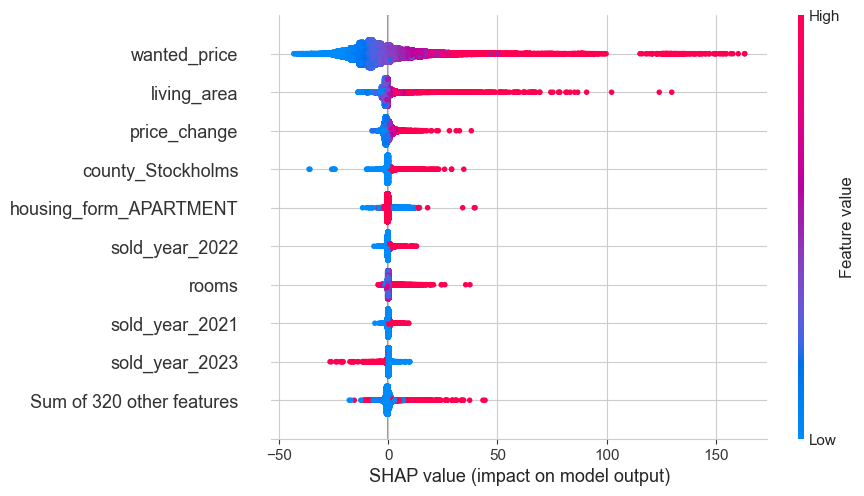

In [62]:
plt.figure(figsize = (12, 8))
shap.plots.beeswarm(shap_values, show = False)
plt.savefig('shap_beeswarm_xgb.png', bbox_inches='tight')
plt.show()

In [64]:
explainer_cb = shap.Explainer(cb)
shap_values_cb = explainer_cb(X_test_shap)

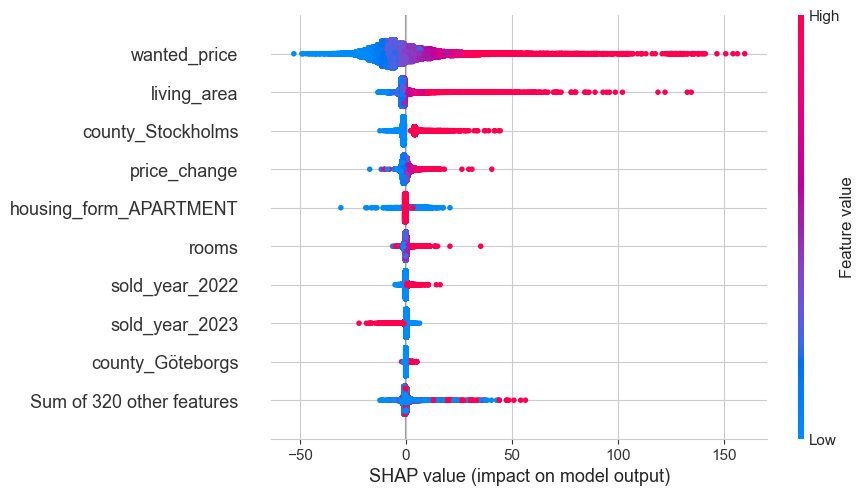

In [65]:
plt.figure(figsize = (12, 8))
shap.plots.beeswarm(shap_values_cb, show = False)
plt.savefig('shap_beeswarm_cb.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize = (12, 8))
shap.plots.beeswarm(shap_values, show = False)
plt.savefig('shap_beeswarm_xgb.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
shap.waterfall_plot(instance_shap_values)
plt.savefig('shap_waterfall_plot_with_feature_names.png', bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize = (12, 8))
shap.waterfall_plot(instance_shap_values, show = False)
plt.savefig('shap_xgb.png')

In [ ]:
def save_feature_importance_plot(model, X_train, feature_names, threshold=0.01, file_name='feature_importance_plot.png'):
    feature_importances = model.get_feature_importance()
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    # Select the top 15 features
    top_features_df = importance_df.head(15)

    plt.figure(figsize=(12, 8))
    plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top 15 Feature Importance Plot for CatBoost')
    plt.tight_layout()

    if top_features_df['Importance'].max() > threshold:
        plt.savefig(file_name, bbox_inches='tight')
        print(f"Plot saved as '{file_name}'")
    else:
        print("No feature exceeds the importance threshold. Plot not saved.")

    plt.close()

In [ ]:
save_feature_importance_plot(cb, X_train, feature_names, threshold = 0.01, file_name = 'feature_importance_catboost.png')

In [ ]:
def save_feature_importance_plot_xgboost(model, X_train, feature_names, threshold=0.01, file_name='feature_importance_plot_xgboost.png'):
    feature_importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    # Select the top 15 features
    top_features_df = importance_df.head(15)

    plt.figure(figsize=(12, 8))
    plt.barh(top_features_df['Feature'], top_features_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Top 15 Feature Importance Plot for XGBoost')
    plt.tight_layout()

    if top_features_df['Importance'].max() > threshold:
        plt.savefig(file_name, bbox_inches='tight')
        print(f"Plot saved as '{file_name}'")
    else:
        print("No feature exceeds the importance threshold. Plot not saved.")

    plt.close()

In [ ]:
save_feature_importance_plot_xgboost(lgb, X_train, feature_names, file_name = 'feature_importance_xgb.png')

In [ ]:
df2.head()

In [ ]:
df['balcony'].value_counts()

In [ ]:
df2['balcony'].value_counts()

In [ ]:
df2['balcony'] = df2['balcony'].map({'Ja' : 1, 'Nej' : 0})

In [ ]:
df2.head()

In [ ]:
one_hot_columns = ['housing_form', 'ownership_type', 'county', 'sold_year', 'sold_month']
drop_columns = ['street', 'build_year', 'land_area', 'area', 'latitude', 'longitude', 'operating_cost',
                 'association', 'broker', 'story' ,'fee','url', 'build_year', 'sold_date', 'floor', 'construction_date']

In [ ]:
dfd2 = pd.get_dummies(df2, columns=one_hot_columns, drop_first=True, dtype=int)
dfd2 = dfd2.drop(columns=drop_columns)
dfd2.head()

In [ ]:
X = dfd2.drop('balcony', axis=1)
y = dfd2['balcony']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Mm = MinMaxScaler()

In [ ]:
X_train_scaled = Mm.fit_transform(X_train)
X_test_scaled = Mm.transform(X_test)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train_scaled, y_train)

In [ ]:
xgb.score(X_test_scaled, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
xgb_pred = xgb.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, xgb_pred))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(xgb, X, y, cv=5).mean()

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgb_class = LGBMClassifier()

In [ ]:
lgb_class.fit(X_train_scaled, y_train)

In [ ]:
lgb_pred = lgb_class.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, lgb_pred))

In [ ]:
df3 = df[df['balcony'].isna()]

In [ ]:
df2.shape[0] / 4

In [ ]:
df3 = df3.sample(72000, random_state=42)

In [ ]:
dflast = pd.concat([df2, df3], axis=0)

In [ ]:
dflast

In [ ]:
one_hot_columns = ['housing_form', 'ownership_type', 'county', 'sold_year', 'sold_month']
drop_columns = ['street', 'build_year', 'land_area', 'area', 'latitude', 'longitude', 'operating_cost',
                'association', 'broker', 'story', 'fee', 'url', 'build_year', 'sold_date', 'floor', 'construction_date']

In [ ]:
dfdlast = pd.get_dummies(dflast, columns=one_hot_columns, drop_first=True, dtype=int)
dfdlast.drop(columns = drop_columns, inplace = True)

In [ ]:
dfdlast['price'] = dfdlast['price'] / 100000
dfdlast['wanted_price'] = dfdlast['wanted_price'] / 100000

In [ ]:
train = dfdlast[dfdlast['balcony'].notna()]
test = dfdlast[dfdlast['balcony'].isna()]

In [ ]:
X_train = train.drop(['balcony'], axis=1)
X_test = test.drop(['balcony'], axis=1)
y_train = train['balcony']
y_test = test['balcony']

In [ ]:
X_train = Mm.fit_transform(X_train)
X_test = Mm.transform(X_test)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
xgb_pred = xgb.predict(X_test)

In [ ]:
xgb_pred

In [ ]:
df3['balcony'] = xgb_pred

In [ ]:
df3['balcony'].value_counts()

In [ ]:
df4 = df3.copy()

In [ ]:
df4['price'] = np.nan

In [ ]:
dflast2 = pd.concat([df2, df4], axis=0)

In [ ]:
dflast2.shape

In [ ]:
dflast2.shape

In [ ]:
dflast2

In [ ]:
one_hot_columns = ['housing_form', 'ownership_type', 'county', 'sold_year', 'sold_month']
drop_columns = ['street', 'build_year', 'land_area', 'area', 'latitude', 'longitude', 'operating_cost',
                'association', 'broker', 'story', 'fee', 'url', 'build_year', 'sold_date', 'floor', 'construction_date']

In [ ]:
dflast2 = pd.get_dummies(dflast2, columns=one_hot_columns, drop_first=True, dtype=int)
dflast2.drop(columns = drop_columns, inplace = True)

In [ ]:
dflast2

In [ ]:
train = dflast2[dflast2['price'].notna()]
test = dflast2[dflast2['price'].isna()]
X_train = train.drop(['price'], axis=1)
X_test = test.drop(['price'], axis=1)
y_train = train['price']
y_test = test['price']

In [ ]:
robust = RobustScaler()

In [ ]:
X_train = robust.fit_transform(X_train)
X_test = robust.transform(X_test)

In [ ]:
cb = CatBoostRegressor(verbose = False)

In [ ]:
cb.fit(X_train, y_train)

In [ ]:
cb_pred = cb.predict(X_test)

In [ ]:
df3['predicted_price'] = cb_pred

In [ ]:
df3

In [ ]:
r2 = r2_score(df3['price'], df3['predicted_price'])

In [ ]:
r2

In [ ]:
mean_absolute_error(df3['price'], df3['predicted_price'])

In [ ]:
sns.regplot(df3, x = 'price', y = 'predicted_price')